# Generating a Random Variable [25 pts]

![Image Description](question1.png)


![Image Description](q1_1.png)
![Image Description](q1_1_written.png)

![Image Description](q1_2.png)

In [14]:
import numpy as np

num_samples = 10000

def generate_RV_Z():
    u = np.random.rand()
    z = np.sqrt( - np.log(1 - u) )
    return z

array_of_Z_RV = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Z_RV[i] = generate_RV_Z()


![Image Description](q1_2a.png)

![Image Description](q1_2a_written.png)

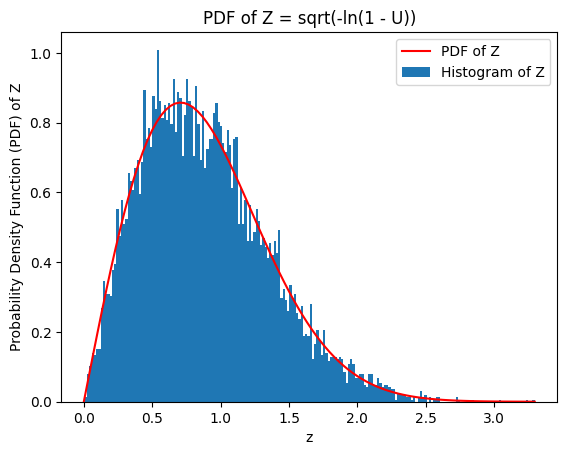

In [29]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(0, np.max(array_of_Z_RV), 100)

#note: in my work above I meant f(z) = 2z * exp(-z^2), not f(x)
pdf_z = 2 * z * np.exp(- (z**2))

plt.plot(z, pdf_z, color='red', label='PDF of Z')
plt.hist(array_of_Z_RV, bins=(num_samples//50), density=True, label='Histogram of Z')

plt.xlabel('z')
plt.ylabel('Probability Density Function (PDF) of Z')
plt.title('PDF of Z = sqrt(-ln(1 - U))')

plt.legend()
plt.show()


![Image Description](q1_2b.png)
![Image Description](q1_2b_written.png)

![Image Description](q1_2c.png)
![Image Description](q1_2c_written.png)

![Image Description](q1_2d.png)

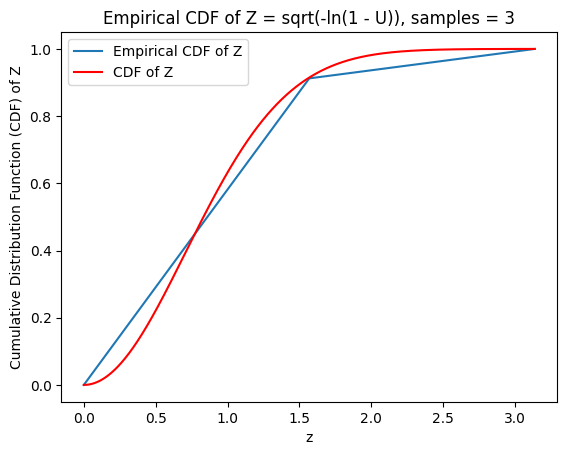

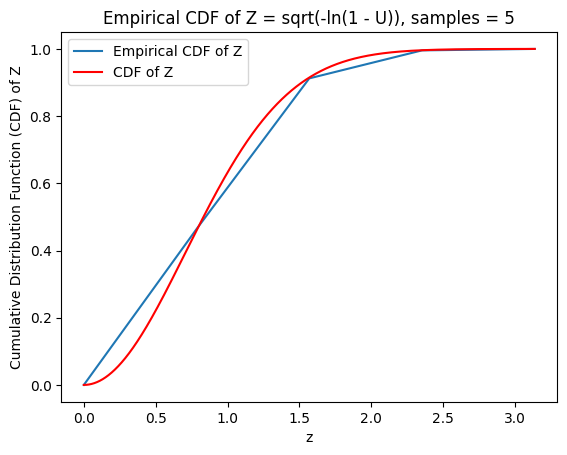

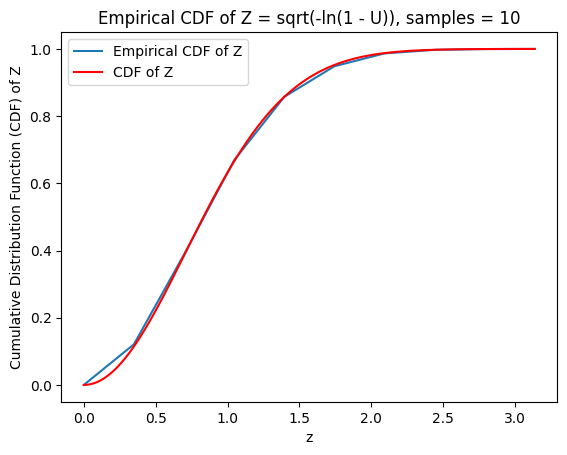

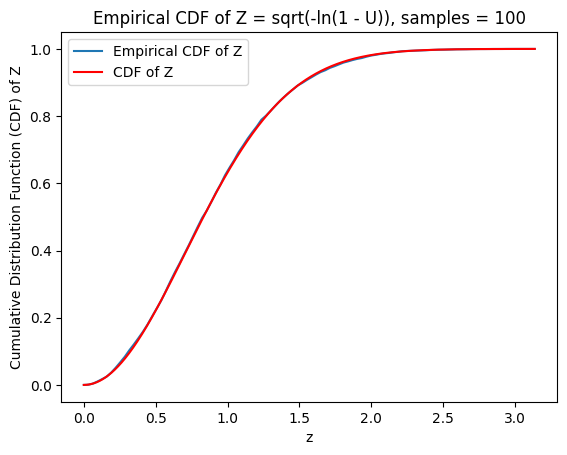

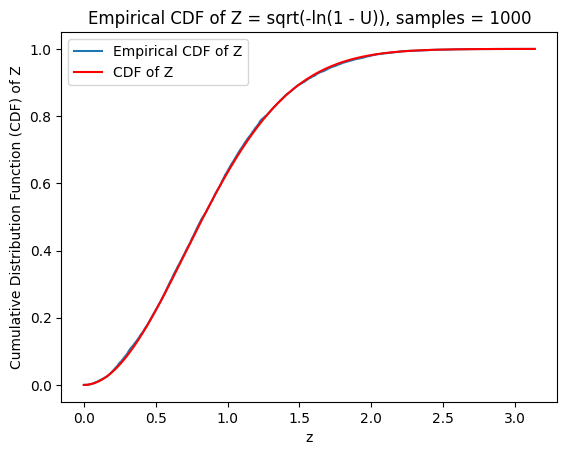

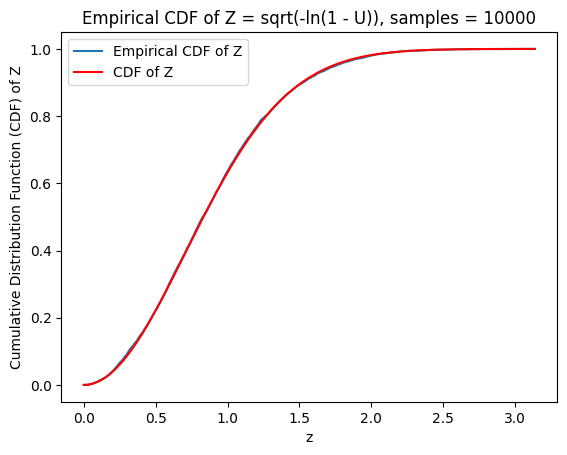

In [82]:

# regenerating samples
num_samples = 10000

array_of_Z_RV = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Z_RV[i] = generate_RV_Z()


# creating a linear space between 0 and the maximum value of the random variable Z
max_Z = np.max(array_of_Z_RV)
min_Z = 0
num_samples_array = [3, 5, 10, 100, 1000, 10000]

for i in range(len(num_samples_array)):
        
    num_less_than_samples = num_samples_array[i]
    num_less_than = np.zeros(num_less_than_samples)
    linspace_x = np.linspace(min_Z, max_Z, num_less_than_samples)

    # checking how many samples less than each value in the linear space, storing in new array
    for j in range(num_less_than_samples):
        num_less_than[j] = np.sum(array_of_Z_RV < linspace_x[j])

# ------------- PLOTS -------------

    # plotting the empirical CDF
    plt.plot(linspace_x, num_less_than/num_samples, label='Empirical CDF of Z')

    # print(num_less_than/num_samples)

    # plotting the theoretical CDF
    cdf_linspace = np.linspace(0, max_Z, num_samples)
    cdf_z = 1 - np.exp(- cdf_linspace**2)

    plt.plot(cdf_linspace, cdf_z, color='red', label='CDF of Z')

    plt.xlabel('z')
    plt.ylabel('Cumulative Distribution Function (CDF) of Z')
    plt.title('Empirical CDF of Z = sqrt(-ln(1 - U)), samples = ' + str(num_samples_array[i]))
    plt.legend()
    plt.show()

